In [17]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image


In [18]:
import helpers as hp

In [19]:
root_dir = "data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = len(files) 
print("Loading " + str(n) + " images")
imgs = [hp.load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [hp.load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 90 # Only use 10 images for training
print(imgs[0].shape)
print(gt_imgs[0].shape)

Loading 100 images
satImage_001.png
Loading 100 images
satImage_001.png
(400, 400, 3)
(400, 400)


In [20]:
patch_size = 16

img_patches = [hp.img_crop(imgs[i], patch_size, patch_size) for i in range(n)]
gt_patches = [hp.img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]

img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))]) #combine the patches of each image
gt_patches =  np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])

print(np.shape(img_patches))
print(np.shape(gt_patches))

(56250, 16, 16, 3)
(56250, 16, 16)


In [21]:
X_aug= np.asarray([hp.extract_features_aug(img_patches[i]) for i in range(len(img_patches))])

Y = np.asarray([hp.value_to_class(np.mean(gt_patches[i]), 0.5) for i in range(len(gt_patches))])

In [22]:
print(X_aug.shape)
print(Y.shape)
print(X_aug[0])

(56250, 22)
(56250,)
[0.20173101 0.19924939 0.17250308 0.01682088 0.01457394 0.01222468
 0.20049021 0.18711704 0.18587624 0.19116116 0.01560416 0.01438847
 0.01333294 0.01471492 0.05570568 0.04905337 0.04763769 0.01493116
 0.00255509 0.00214226 0.00193193 0.00037427]


In [23]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5, class_weight="balanced")

logreg.fit(X_aug, Y)

C:\Users\levit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
img_idx=71
root_dir = "data/training/"
image_dir = root_dir + "images/"
patch_size=16
degree=5

img=hp.load_image(image_dir + files[img_idx])
print(img.shape)
img_patch=hp.img_crop(img, patch_size, patch_size)
print(len(img_patches))
Xi=np.asarray([hp.extract_features_aug(img_patch[i]) for i in range(len(img_patch))])

Zi=logreg.predict(Xi)

print(Xi.shape)

(400, 400, 3)
56250
(625, 22)


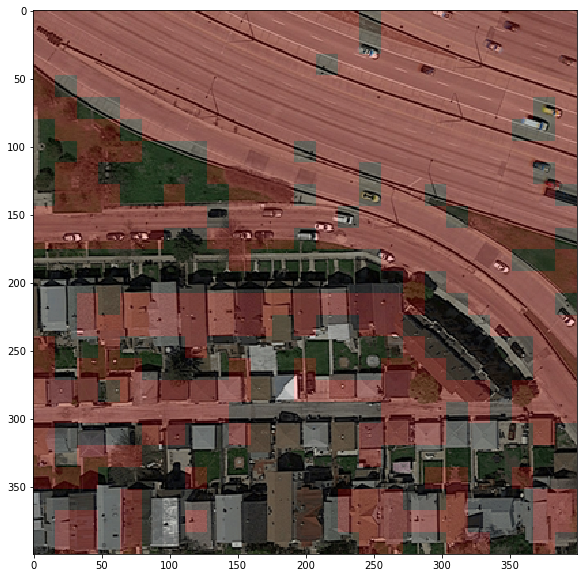

In [30]:
w = gt_imgs[img_idx].shape[0]
h = gt_imgs[img_idx].shape[1]
predicted_im = hp.label_to_img(w, h, patch_size, patch_size, Zi)
cimg = hp.concatenate_images(imgs[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
plt.imshow(cimg, cmap='Greys_r')

new_img = hp.make_img_overlay(imgs[img_idx], predicted_im)

plt.imshow(new_img)

In [61]:
print(img_patch[0][0,0,0])

0.33333334
